# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.sales_channel.value_counts()
mapping = {
    "Internet": 0,
    "Mobile": 1,
}
df["sales_channel"] = df["sales_channel"].map(mapping)

In [8]:
df.trip_type.value_counts()
mapping = {
    "RoundTrip": 0,
    "OneWay": 1,
    "CircleTrip": 2,
}
df["trip_type"] = df["trip_type"].map(mapping)

In [9]:
df.route.value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [10]:
df.booking_origin.unique

<bound method Series.unique of 0        New Zealand
1        New Zealand
2              India
3        New Zealand
4              India
            ...     
49995      Australia
49996      Australia
49997      Australia
49998      Australia
49999      Australia
Name: booking_origin, Length: 50000, dtype: object>

In [11]:
df.booking_complete.value_counts() # Imbalance dataset 

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 5.3+

In [13]:
df.drop(columns=['route','booking_origin'],axis=1,inplace=True)

In [14]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.012380,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [15]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,-0.002261,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,-0.021237,-0.013399,-0.060352,0.022375,0.042095,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,-0.002261,-0.021237,1.000000,0.008443,-0.006510,0.002758,0.001381,0.014078,-0.005668,-0.011955,0.039071,-0.027021
purchase_lead,0.212606,-0.013399,0.008443,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,-0.006510,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,0.002758,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.042095,0.001381,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.054254,0.014078,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,0.032943,-0.005668,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022235,-0.011955,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511


In [16]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [17]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0


## Modelling


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [19]:
X = df.iloc[: ,:-1]
y = df.iloc[:, -1]


In [20]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)



In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data (only use transform, not fit_transform, to avoid data leakage)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score

In [24]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "KNeighbours":KNeighborsClassifier(),
    "SVC":SVC(),
    "XGBoost":XGBClassifier(),
    "AdaBoosting": AdaBoostClassifier(),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred,) # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6289
- F1 score: 0.6500
- Precision: 0.6136
- Recall: 0.6909
- Roc Auc Score: 0.6290
----------------------------------
Model performance for Test set
- Accuracy: 0.6304
- F1 score: 0.6521
- Precision: 0.6191
- Recall: 0.6888
- Roc Auc Score: 0.6300


Decision Tree
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9998
- Recall: 0.9996
- Roc Auc Score: 0.9997
----------------------------------
Model performance for Test set
- Accuracy: 0.8375
- F1 score: 0.8423
- Precision: 0.8230
- Recall: 0.8624
- Roc Auc Score: 0.8374


Random Forest
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9996
- Recall: 0.9999
- Roc Auc Score: 0.9997
----------------------------------
Model performance for Test set
- Accuracy: 0.8605
- F1 score: 0.8598
- Precision: 0.8688
- Recall: 0.8511
- Roc Auc Score: 0.8605


Gradient Boost
Model performance for Training se

d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoosting
Model performance for Training set
- Accuracy: 0.7499
- F1 score: 0.7536
- Precision: 0.7410
- Recall: 0.7666
- Roc Auc Score: 0.7500
----------------------------------
Model performance for Test set
- Accuracy: 0.7516
- F1 score: 0.7562
- Precision: 0.7467
- Recall: 0.7660
- Roc Auc Score: 0.7515




In [25]:
dt_params = {
        'criterion':['gini', 'entropy', 'log_loss'],
        'splitter':['best','random'],
        'max_features':['sqrt','log2'],
        'max_depth':[5,7,9,10,11,13,15],
    }
                
rf_params  = {
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_features':['sqrt','log2',None],
            'n_estimators': [8,16,32,64,128,256,500],
            'max_depth':[5,7,9,10,11,13,15],
            "min_samples_split": [2, 8, 15, 20],
            "class_weight":["balanced", "balanced_subsample"]
    }
                
gr_boot_params = {
            'loss':['log_loss', 'exponential'],
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
            'criterion':['squared_error', 'friedman_mse'],
            'max_features':['sqrt','log2'],
            'n_estimators': [8,16,32,64,128,256],
    }

xg_boost_params = {
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256],
        }
ada_boost_params ={
                    'learning_rate':[.1,.01,0.5,.001],
                    'n_estimators': [8,16,32,64,128,256],
        }


In [26]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("DT", DecisionTreeClassifier(), dt_params),
                   ("gr_boost",GradientBoostingClassifier(), gr_boot_params),
                   ("xg_boost_params",XGBClassifier(),xg_boost_params),
                   ("ada_boost_params",AdaBoostClassifier(),ada_boost_params),
                   ]

In [27]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


---------------- Best Params for RF -------------------
{'n_estimators': 32, 'min_samples_split': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
---------------- Best Params for DT -------------------
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 15, 'criterion': 'gini'}
---------------- Best Params for gr_boost -------------------
{'subsample': 0.85, 'n_estimators': 256, 'max_features': 'log2', 'loss': 'log_loss', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
---------------- Best Params for xg_boost_params -------------------
{'n_estimators': 256, 'learning_rate': 0.1}
---------------- Best Params for ada_boost_params -------------------
{'n_estimators': 256, 'learning_rate': 0.5}


In [28]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(splitter='best', max_features= 'log2', max_depth= 15, criterion= 'gini'),
    "Random Forest":RandomForestClassifier(n_estimators=32, min_samples_split = 2, max_features=None,
                                            max_depth= 15, criterion= 'gini',class_weight= 'balanced_subsample'),
    "Gradient Boost":GradientBoostingClassifier (subsample=0.85, n_estimators= 256, max_features= 'log2', loss= 'log_loss',
                                                learning_rate= 0.1, criterion= 'friedman_mse'),
    "KNeighbours":KNeighborsClassifier(),
    "SVC":SVC(),
    "XGBoost":XGBClassifier(n_estimators= 256, learning_rate=0.1),
    "AdaBoosting": AdaBoostClassifier(n_estimators= 256, learning_rate= 0.5),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred,) # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6289
- F1 score: 0.6500
- Precision: 0.6136
- Recall: 0.6909
- Roc Auc Score: 0.6290
----------------------------------
Model performance for Test set
- Accuracy: 0.6304
- F1 score: 0.6521
- Precision: 0.6191
- Recall: 0.6888
- Roc Auc Score: 0.6300


Decision Tree
Model performance for Training set
- Accuracy: 0.7801
- F1 score: 0.7875
- Precision: 0.7601
- Recall: 0.8169
- Roc Auc Score: 0.7802
----------------------------------
Model performance for Test set
- Accuracy: 0.7254
- F1 score: 0.7369
- Precision: 0.7110
- Recall: 0.7648
- Roc Auc Score: 0.7252


Random Forest
Model performance for Training set
- Accuracy: 0.8888
- F1 score: 0.8839
- Precision: 0.9227
- Recall: 0.8482
- Roc Auc Score: 0.8887
----------------------------------
Model performance for Test set
- Accuracy: 0.8409
- F1 score: 0.8313
- Precision: 0.8906
- Recall: 0.7794
- Roc Auc Score: 0.8413


Gradient Boost
Model performance for Training se

d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoosting
Model performance for Training set
- Accuracy: 0.7687
- F1 score: 0.7666
- Precision: 0.7716
- Recall: 0.7616
- Roc Auc Score: 0.7687
----------------------------------
Model performance for Test set
- Accuracy: 0.7670
- F1 score: 0.7661
- Precision: 0.7734
- Recall: 0.7590
- Roc Auc Score: 0.7670




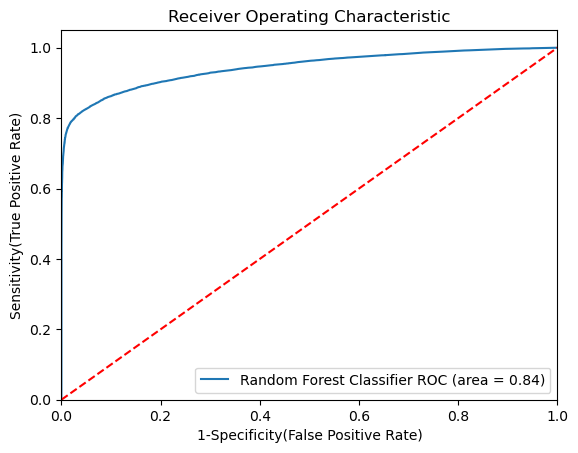

In [29]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8413
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 